### Homework 3.4 - Testing out filters

We are testing out the following filters:

- Low pass filter
- High pass filter
- Band filter
- Guassian blur filter

Pick an image of your choice and apply those filters on it.

**You must show all the steps clearly. Write your explanation in the markdown boxes.**

## Most of the codes are explained and copied from the previous homework

Thats why some variables have 'cat' in the name

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import misc, fftpack
import cv2
%matplotlib inline

limmy = mpimg.imread('images/idontgetit.jpg')
w,h = (len(limmy),len(limmy[0]))

## Low pass filter

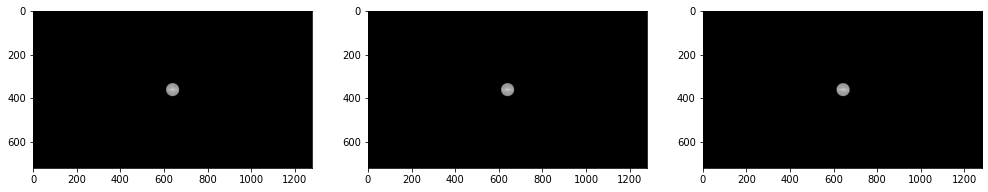

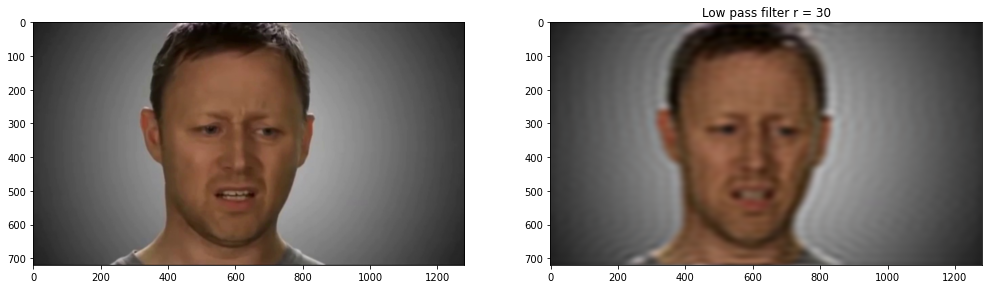

In [2]:
r = 30 #radius of the mask that we will allow the 
rgbcat = []
rgbmask = []
for i in range(3):
    fourier = fftpack.fftshift(fftpack.fft2((limmy[:, :, i]))) # fourier transform the image
    
    mask=np.zeros((w,h))
    
    mask[mask ==0 ] = 1 
    for y in range(h):
        for x in range(w):
            if (x-w/2)**2 + (y-h/2)**2 < r**2: #create low pass filter mask with radius r
                mask[x][y] = 0 

    fourier[mask != 0] = 1
    masked_fourier = (np.abs(fourier))**0.0001
    rgbmask.append(masked_fourier)
    
    rgbcat.append(abs(fftpack.ifft2(fourier)))

cat = np.dstack([rgbcat[0]/255,rgbcat[1]/255,rgbcat[2]/255])

fig1, ax1 = plt.subplots(1, 3, figsize=(17,12))
ax1[0].imshow(rgbmask[0],cmap = 'gray')
ax1[1].imshow(rgbmask[1],cmap = 'gray')
ax1[2].imshow(rgbmask[2],cmap = 'gray')
fig2, ax2 = plt.subplots(1, 2, figsize=(17,12))
ax2[0].imshow(limmy)
ax2[1].set_title('Low pass filter '  + f'r = {r}')
ax2[1].imshow(cat)


## High pass filter
Same thing as before but we swap the how we create the mask

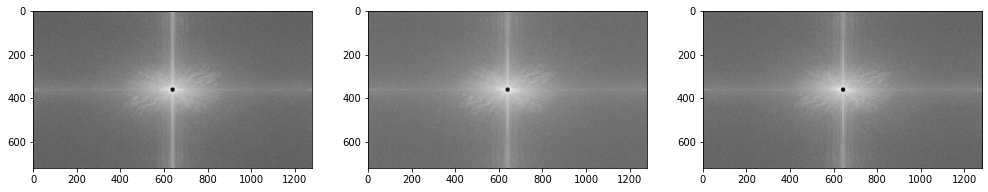

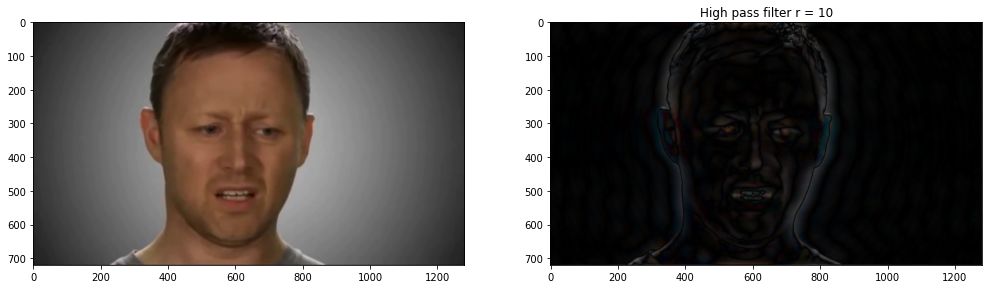

In [3]:
r = 10
rgbcat = []
rgbmask = []
for i in range(3):
    fourier = fftpack.fftshift(fftpack.fft2((limmy[:, :, i])))
    
    mask=np.zeros((w,h))
    mask[mask ==0 ] = 1 
    for y in range(h):
        for x in range(w):
            if (x-w/2)**2 + (y-h/2)**2 > r**2: #create high pass filter mask with radius r
                mask[x][y] = 0

    fourier[mask != 0] = 1
    masked_fourier = (np.abs(fourier))**0.0001
    rgbmask.append(masked_fourier)
    
    rgbcat.append(abs(fftpack.ifft2(fourier)))

cat = np.dstack([rgbcat[0]/255,rgbcat[1]/255,rgbcat[2]/255])

fig1, ax1 = plt.subplots(1, 3, figsize=(17,12))
ax1[0].imshow(rgbmask[0],cmap = 'gray')
ax1[1].imshow(rgbmask[1],cmap = 'gray')
ax1[2].imshow(rgbmask[2],cmap = 'gray')
fig2, ax2 = plt.subplots(1, 2, figsize=(17,12))
ax2[0].imshow(limmy)
ax2[1].set_title('High pass filter ' + f'r = {r}')
ax2[1].imshow(cat)


## Band filter
Picking the data in between r1 and r2

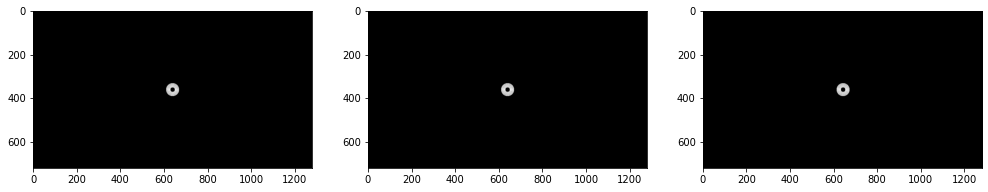

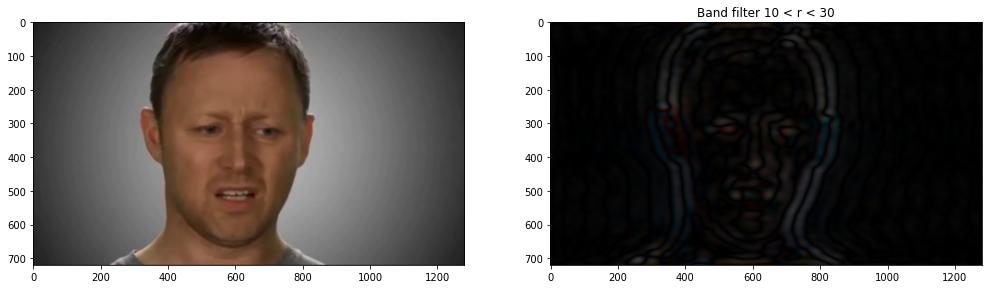

In [125]:
r1 = 10
r2 = 30
rgbcat = []
rgbmask = []
for i in range(3):
    fourier = fftpack.fftshift(fftpack.fft2((limmy[:, :, i])))
    
    mask=np.zeros((w,h))
    mask[mask ==0 ] = 1 
    for y in range(h):
        for x in range(w):
            if  r1**2 < (x-w/2)**2 + (y-h/2)**2 < r2**2: #create the mask
                mask[x][y] = 0
    fourier[mask != 0] = 1
    masked_fourier = (np.abs(fourier))**0.0001
    rgbmask.append(masked_fourier)
    
    rgbcat.append(abs(fftpack.ifft2(fourier)))

cat = np.dstack([rgbcat[0]/255,rgbcat[1]/255,rgbcat[2]/255])

fig1, ax1 = plt.subplots(1, 3, figsize=(17,12))
ax1[0].imshow(rgbmask[0],cmap = 'gray')
ax1[1].imshow(rgbmask[1],cmap = 'gray')
ax1[2].imshow(rgbmask[2],cmap = 'gray')
fig2, ax2 = plt.subplots(1, 2, figsize=(17,12))
ax2[0].imshow(limmy)
ax2[1].set_title('Band filter ' + f'{r1} < r < {r2}')
ax2[1].imshow(cat)


## Band filter
Disgarding the data in between r1 and r2

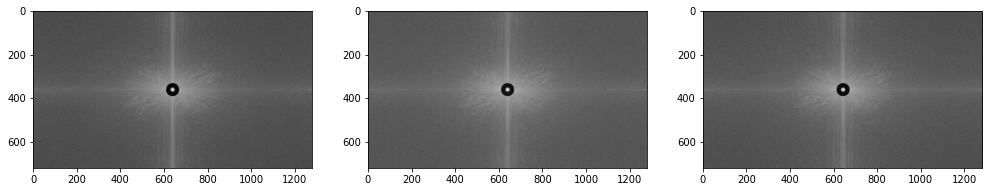

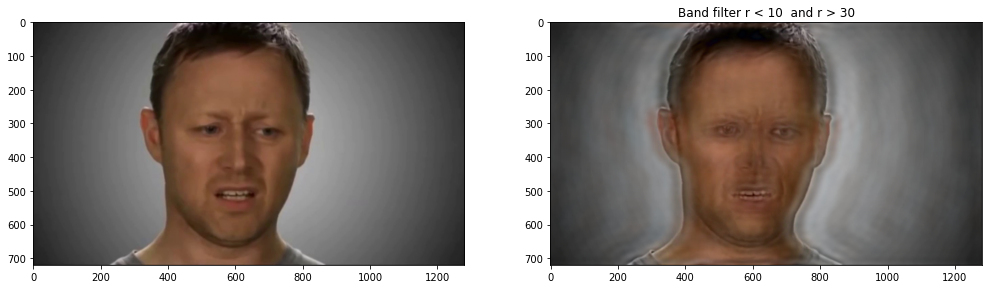

In [4]:
r1 = 10
r2 = 30
rgbcat = []
rgbmask = []
for i in range(3):
    fourier = fftpack.fftshift(fftpack.fft2((limmy[:, :, i])))

    mask=np.zeros((w,h))
    mask[mask ==0 ] = 1 
    for y in range(h):
        for x in range(w):
            if  r1**2 > (x-w/2)**2 + (y-h/2)**2:
                mask[x][y] = 0
            elif (x-w/2)**2 + (y-h/2)**2> r2**2:
                mask[x][y] = 0
    fourier[mask != 0] = 1
    masked_fourier = (np.abs(fourier))**0.0001
    rgbmask.append(masked_fourier)
    
    rgbcat.append(abs(fftpack.ifft2(fourier)))

cat = np.dstack([rgbcat[0]/255,rgbcat[1]/255,rgbcat[2]/255])

fig1, ax1 = plt.subplots(1, 3, figsize=(17,12))
ax1[0].imshow(rgbmask[0],cmap = 'gray')
ax1[1].imshow(rgbmask[1],cmap = 'gray')
ax1[2].imshow(rgbmask[2],cmap = 'gray')
fig2, ax2 = plt.subplots(1, 2, figsize=(17,12))
ax2[0].imshow(limmy)
ax2[1].set_title('Band filter ' + f'r < {r1}  and r > {r2}')
ax2[1].imshow(cat)


## Gaussian Blur
We will convolute the gaussian function on to the image

Gaussian function is
$$G(x,y) = \frac{1}{\sqrt{2\pi\sigma ^2}} \exp(-\frac{x^2+y^2}{2\sigma^2})$$

In [10]:
def G(x,y,sigma): #gaussian function
    return (np.exp(-(x**2+y**2)/(2*sigma**2)))*(2*np.pi*sigma**2)

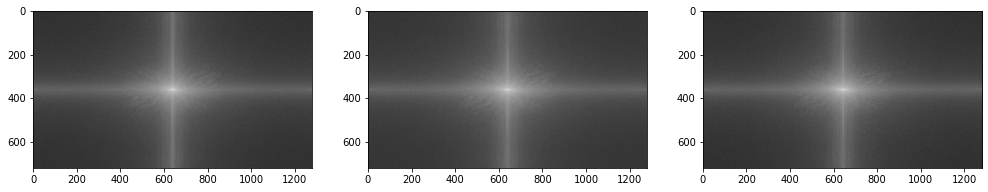

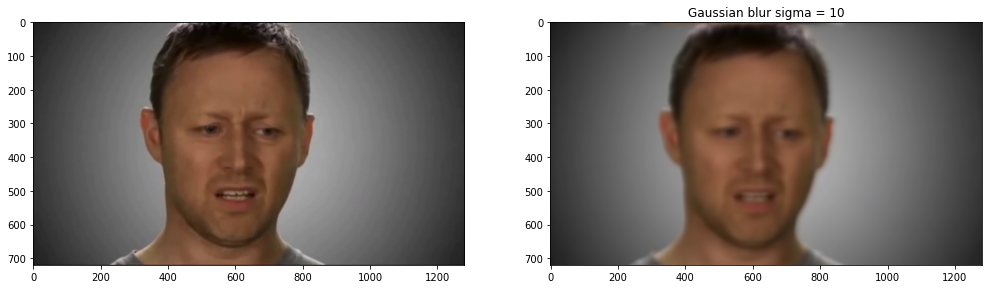

In [11]:
sigma = 10
rgbcat = []
rgbmask = []

gauss=np.zeros((w,h))
for y in range(h):
    for x in range(w):
        gauss[x][y] = G(x,y,sigma) #create the mask

gfourier = fftpack.fftshift(fftpack.fft2((gauss))) #fourier of Gaussian
gfourier = gfourier / gfourier.max() #normalise the fourier space

for i in range(3):
    fourier = fftpack.fftshift(fftpack.fft2((limmy[:, :, i])))
    
    for y in range(h):
        for x in range(w):
            fourier[x][y] =  fourier[x][y] * gfourier[x][y]  #convolute gaussian to the image
    
    masked_fourier = (np.abs(fourier))**0.01
    
    rgbmask.append(masked_fourier)
    rgbcat.append(abs(fftpack.ifft2(fourier)))

cat = np.dstack([rgbcat[0]/255,rgbcat[1]/255,rgbcat[2]/255])

fig1, ax1 = plt.subplots(1, 3, figsize=(17,12))
ax1[0].imshow(rgbmask[0],cmap = 'gray')
ax1[1].imshow(rgbmask[1],cmap = 'gray')
ax1[2].imshow(rgbmask[2],cmap = 'gray')
fig2, ax2 = plt.subplots(1, 2, figsize=(17,12))
ax2[0].imshow(limmy)
ax2[1].set_title('Gaussian blur '  + f'sigma = {sigma}')
ax2[1].imshow(cat)
